In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [16]:
#加载数据集
mnist=input_data.read_data_sets('dataset/',one_hot=True);

Extracting dataset/train-images-idx3-ubyte.gz
Extracting dataset/train-labels-idx1-ubyte.gz
Extracting dataset/t10k-images-idx3-ubyte.gz
Extracting dataset/t10k-labels-idx1-ubyte.gz


In [17]:
#mnist数据集类型，训练集和测试集数量
print("type of 'mnist is %s'" % (type(mnist)))
print("number of train data is %d" % mnist.train.num_examples)
print("number of test data is %d" % mnist.test.num_examples)

type of 'mnist is <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>'
number of train data is 55000
number of test data is 10000


In [18]:
#训练集和测试集的图片和标签类型
train_img=mnist.train.images
print('type train_img is %s' % (type(train_img)))

train_label=mnist.train.labels
print('type train_label is %s' % (type(train_label)))

test_img=mnist.test.images
print("Type of test_img is %s" % (type(test_img)))

test_label=mnist.test.labels
print("Type of test_label is %s" % (type(test_label)))

type train_img is <class 'numpy.ndarray'>
type train_label is <class 'numpy.ndarray'>
Type of test_img is <class 'numpy.ndarray'>
Type of test_label is <class 'numpy.ndarray'>


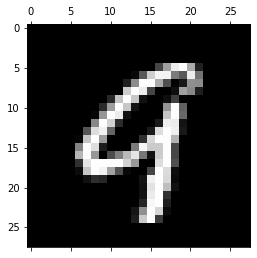

In [19]:
#可视化
import numpy as np
import matplotlib.pyplot as plt

rand=np.random.randint(train_img.shape[0],size=1)

for i in rand:
    show_img=np.reshape(train_img[i,:],(28,28))
    show_label=np.argmax(train_label[i,:])
    plt.matshow(show_img,cmap=plt.get_cmap('gray'))
    plt.show()

In [20]:
#保存为RGB图片
from PIL import Image
import struct
import gzip

def save_imgRgb(path_img):
    with gzip.open(path_img) as bytestream:
        index=0
        buf=bytestream.read()
        magic,images,row,col=struct.unpack_from('>IIII',buf,index)
        index+=struct.calcsize('>IIII')
        for i in range(10):
            img=Image.new('RGB',(col,row))
            for x in range(row):
                for y in range(col):
                    img.putpixel((y,x),int(struct.unpack_from('>B',buf,index)[0]))
                    index+=struct.calcsize('>B')
            img.save('img_rgb/'+str(i)+'.png')
    return

save_imgRgb('dataset/train-images-idx3-ubyte.gz')

In [21]:
#保存为GRAY图片
from PIL import Image

def save_imgGray(path_img):
    for i in range(10):
        img=mnist.train.images[i,:]
        img=img.reshape(28,28)
        name_img='img_gray/'+'%d.jpg' % i
        Image.fromarray((img*255).astype('uint8'),mode='L').save(name_img)
    return 

save_imgGray('dataset/train-images-idx3-ubyte.gz')

In [22]:
#使用逻辑回归训练数据集

X=tf.placeholder(tf.float32,[None,784])#输入向量X
y=tf.placeholder(tf.float32,[None,10])#输出类别y

#模型参数
W=tf.Variable(tf.zeros([784,10]))#权重
b=tf.Variable(tf.zeros([10]))#偏置

#使用softmax()对输出数据进行处理
actv=tf.nn.softmax(tf.matmul(X,W)+b)

#使用交叉熵损失函数
loss=tf.reduce_mean(-tf.reduce_sum(y*tf.log(tf.clip_by_value(actv,1e-10,1.0)),reduction_indices=1))

#使用梯度下降优化参数
lr=0.01
optm=tf.train.AdamOptimizer(lr).minimize(loss)

#判断预测值和标签值是否已有一样
pred=tf.equal(tf.argmax(actv,1),tf.argmax(y,1))

#求pred的均值，即为准确率
accr=tf.reduce_mean(tf.cast(pred,tf.float32))

In [23]:
#初始化
init_op=tf.global_variables_initializer()

#设置超参数
epochs_num=10001
batch_size=100
display_step=500

with tf.Session() as sess:
    sess.run(init_op)
    for epoch in range(epochs_num):
        avg_loss=0
        #计算训练数据可以划分多少个batch大小的组
        num_batch=int(mnist.train.num_examples/batch_size)
                
        for i in range(num_batch):
            #next_batch():第一次取1-10，第二次取11-20,...
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            #开始训练
            feeds={X:batch_xs,y:batch_ys}
            sess.run(optm,feed_dict=feeds)
            #累积计算总损失值
            avg_loss+=sess.run(loss,feed_dict=feeds)/num_batch
        
        #打印数据
        if (epoch % display_step==0):
            #全部训练集
            feed_train={X:train_img,y:train_label}
            #测试
            feed_test={X:test_img,y:test_label}
            train_acc=sess.run(accr,feed_dict=feed_train)
            test_acc=sess.run(accr,feed_dict=feed_test)
            
            #打印参数
            print('Epoch:%04d/%04d,loss:%.6f,train_acc:%.6f,test_acc:%.6f' % 
                 (epoch,epochs_num,avg_loss,train_acc,test_acc))

print('Finsh!')

Epoch:0000/10001,loss:0.342632,train_acc:0.916545,test_acc:0.920500
Epoch:0500/10001,loss:0.230439,train_acc:0.931709,test_acc:0.908200
Epoch:1000/10001,loss:0.232333,train_acc:0.937145,test_acc:0.909700
Epoch:1500/10001,loss:0.230566,train_acc:0.934455,test_acc:0.907100
Epoch:2000/10001,loss:0.234246,train_acc:0.938109,test_acc:0.914200
Epoch:2500/10001,loss:0.231380,train_acc:0.939127,test_acc:0.912500
Epoch:3000/10001,loss:0.232131,train_acc:0.940018,test_acc:0.913700
Epoch:3500/10001,loss:0.231499,train_acc:0.932655,test_acc:0.906700
Epoch:4000/10001,loss:0.231304,train_acc:0.937836,test_acc:0.910900
Epoch:4500/10001,loss:0.231856,train_acc:0.934018,test_acc:0.907800
Epoch:5000/10001,loss:0.230909,train_acc:0.936236,test_acc:0.912900
Epoch:5500/10001,loss:0.232853,train_acc:0.930345,test_acc:0.905400
Epoch:6000/10001,loss:0.232381,train_acc:0.925836,test_acc:0.901300
Epoch:6500/10001,loss:0.231979,train_acc:0.926564,test_acc:0.902900
Epoch:7000/10001,loss:0.232359,train_acc:0.93594